In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [27]:
url='https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df=df.drop(labels=['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
label_def={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Class']=df['Species'].map(label_def)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [29]:
df=df.dropna()

In [30]:
X=df.drop(labels=["Species","Class"],axis=1).values
print(len(np.where(np.isnan(X))[0]))

0


In [31]:
from sklearn.model_selection import train_test_split
X=df.drop(labels=['Class','Species'],axis=1)
y=df.Class

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
X_train.shape
X_test.shape

(45, 4)

PCA

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
train_reduced=pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.91939858 0.05522612]
[4.02578705 0.24181962]


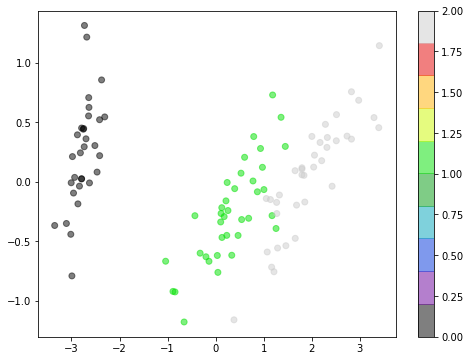

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_train,alpha=0.5,cmap=plt.cm.get_cmap("nipy_spectral",10))
plt.colorbar()
plt.show()

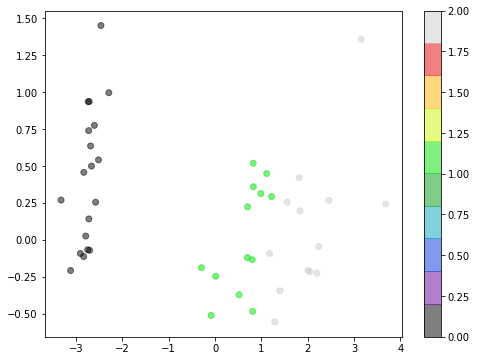

In [43]:
test_reduced=pca.transform(X_test)
plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:,0],test_reduced[:,1],c=y_test,alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

T-SNE

In [49]:
from sklearn.manifold import TSNE
tsneModel=TSNE(n_components=2,random_state=42,n_iter=1000)
train_reduced=tsneModel.fit_transform(X_train)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


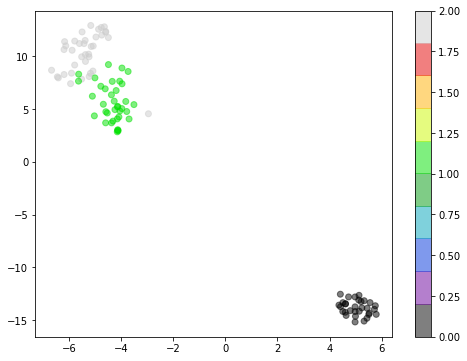

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_train,alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()